In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
# warnings.simplefilter(action = 'ignore')

import os

import numpy as np
import pandas as pd

import sklearn
from sklearn import set_config

from sklearn.tree import DecisionTreeClassifier

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

import xgboost

Cargamos la matriz de estudiantes únicamente con datos de España (previamente filtrada)

In [3]:
# si tenéis que poner vuestro path aquí, comentad el de abajo y poned el vuestro :)
df_students_spain = pd.read_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_spain.csv') # sara

In [4]:
df_students_spain.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,Spain,Spain,72400442.0,72400001.0,08MS,Spain,"ESP - stratum 15: Castilla - La Mancha,Public",Spain,Spain: Castile-La Mancha,Yes,...,507.720,482.708,473.829,518.818,510.025,474.003,486.331,513.218,0.32199,01MAY23:16:47:23
1,Spain,Spain,72400658.0,72400003.0,08MS,Spain,"ESP - stratum 31: País Vasco,Public,Public",Spain,Spain: Basque Country,Yes,...,474.867,522.442,480.818,416.860,535.585,458.814,419.433,525.250,0.09103,01MAY23:16:47:28
2,Spain,Spain,72400504.0,72400006.0,08MS,Spain,"ESP - stratum 01: Andalucía,Public",Spain,Spain: Andalusia,Yes,...,309.691,219.090,275.138,328.206,189.496,244.839,216.095,310.887,0.96973,01MAY23:16:47:19
3,Spain,Spain,72400761.0,72400007.0,08MS,Spain,"ESP - stratum 23: La Rioja,Public",Spain,Spain: La Rioja,Yes,...,355.727,403.009,412.793,331.181,364.536,440.398,419.701,291.878,0.05187,01MAY23:16:47:25
4,Spain,Spain,72400784.0,72400010.0,08MS,Spain,"ESP - stratum 26: Madrid,Private",Spain,Spain: Madrid,Yes,...,564.697,586.783,546.132,625.176,476.592,490.397,543.891,551.054,0.32544,01MAY23:16:47:26


In [5]:
# Configurar pandas para que no trunque la salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_students_spain.iloc[:, :].head())

     CNT CNTRYID    CNTSCHID    CNTSTUID   CYC NatCen  \
0  Spain   Spain  72400442.0  72400001.0  08MS  Spain   
1  Spain   Spain  72400658.0  72400003.0  08MS  Spain   
2  Spain   Spain  72400504.0  72400006.0  08MS  Spain   
3  Spain   Spain  72400761.0  72400007.0  08MS  Spain   
4  Spain   Spain  72400784.0  72400010.0  08MS  Spain   

                                         STRATUM SUBNATIO  \
0  ESP - stratum 15: Castilla - La Mancha,Public    Spain   
1     ESP - stratum 31: País Vasco,Public,Public    Spain   
2             ESP - stratum 01: Andalucía,Public    Spain   
3              ESP - stratum 23: La Rioja,Public    Spain   
4               ESP - stratum 26: Madrid,Private    Spain   

                     REGION OECD ADMINMODE LANGTEST_QQQ LANGTEST_COG  \
0  Spain: Castile-La Mancha  Yes  Computer          NaN      Spanish   
1     Spain: Basque Country  Yes  Computer       Basque       Basque   
2          Spain: Andalusia  Yes  Computer      Spanish      Spanish   
3 

In [6]:
print(list(df_students_spain.columns))

['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA', 'ST256Q02JA', 'ST256Q03JA', 'ST256Q06JA', 'ST256Q07JA', 'ST256Q08JA', 'ST256Q09JA', 'ST256Q10JA', 'ST230Q01JA', 'ST005Q01JA', 'ST006Q01JA', 'ST006Q02JA', 'ST006Q03JA', 'ST006Q04JA', 'ST006Q05JA', 'ST007Q01JA', 'ST008Q01JA', 'ST008Q02JA', 'ST008Q03JA', 'ST008Q04JA', 'ST008Q05JA', 'ST258Q01JA', 'ST259Q01JA', 'ST259Q02JA', 'ST019AQ01T', 'ST019BQ01

## Preprocesado inicial

Empezamos descartando las columnas que sabemos que no vamos a usar. 

* Pesos estadísticos (W_FSTUWT*): No los vamos a usar para entrenar el modelo.

In [7]:
# elimiar columnas que empiezan por W_FSTURWT

df_students_spain = df_students_spain.drop(df_students_spain.filter(regex='^W_FSTURWT').columns, axis=1)


* Information and Communication (IC*): Relacionadas con el uso de recursos tecnológicos de los estudiantes, no son relevantes para nuestro modelo.

In [8]:
df_students_spain = df_students_spain.drop(df_students_spain.filter(regex='^IC').columns, axis=1)

* Financial Literacy (FL*): Relacionadas con la cultura financiera de los estudiantes, sus experiencias con la gestión del dinero y su comportamiento financiero. Tampoco vamos a incluirlas en el modelo.

In [9]:
df_students_spain = df_students_spain.drop(df_students_spain.filter(regex='^FL').columns, axis=1)

In [10]:
print(list(df_students_spain.columns))

['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA', 'ST256Q02JA', 'ST256Q03JA', 'ST256Q06JA', 'ST256Q07JA', 'ST256Q08JA', 'ST256Q09JA', 'ST256Q10JA', 'ST230Q01JA', 'ST005Q01JA', 'ST006Q01JA', 'ST006Q02JA', 'ST006Q03JA', 'ST006Q04JA', 'ST006Q05JA', 'ST007Q01JA', 'ST008Q01JA', 'ST008Q02JA', 'ST008Q03JA', 'ST008Q04JA', 'ST008Q05JA', 'ST258Q01JA', 'ST259Q01JA', 'ST259Q02JA', 'ST019AQ01T', 'ST019BQ01

In [11]:
# obtenemos todos los nombres de las columnas que empiezan por PV

for i in df_students_spain.columns[df_students_spain.columns.str.startswith('PV')]:
    print(i)

PV1MATH
PV2MATH
PV3MATH
PV4MATH
PV5MATH
PV6MATH
PV7MATH
PV8MATH
PV9MATH
PV10MATH
PV1READ
PV2READ
PV3READ
PV4READ
PV5READ
PV6READ
PV7READ
PV8READ
PV9READ
PV10READ
PV1SCIE
PV2SCIE
PV3SCIE
PV4SCIE
PV5SCIE
PV6SCIE
PV7SCIE
PV8SCIE
PV9SCIE
PV10SCIE
PV1MCCR
PV2MCCR
PV3MCCR
PV4MCCR
PV5MCCR
PV6MCCR
PV7MCCR
PV8MCCR
PV9MCCR
PV10MCCR
PV1MCQN
PV2MCQN
PV3MCQN
PV4MCQN
PV5MCQN
PV6MCQN
PV7MCQN
PV8MCQN
PV9MCQN
PV10MCQN
PV1MCSS
PV2MCSS
PV3MCSS
PV4MCSS
PV5MCSS
PV6MCSS
PV7MCSS
PV8MCSS
PV9MCSS
PV10MCSS
PV1MCUD
PV2MCUD
PV3MCUD
PV4MCUD
PV5MCUD
PV6MCUD
PV7MCUD
PV8MCUD
PV9MCUD
PV10MCUD
PV1MPEM
PV2MPEM
PV3MPEM
PV4MPEM
PV5MPEM
PV6MPEM
PV7MPEM
PV8MPEM
PV9MPEM
PV10MPEM
PV1MPFS
PV2MPFS
PV3MPFS
PV4MPFS
PV5MPFS
PV6MPFS
PV7MPFS
PV8MPFS
PV9MPFS
PV10MPFS
PV1MPIN
PV2MPIN
PV3MPIN
PV4MPIN
PV5MPIN
PV6MPIN
PV7MPIN
PV8MPIN
PV9MPIN
PV10MPIN
PV1MPRE
PV2MPRE
PV3MPRE
PV4MPRE
PV5MPRE
PV6MPRE
PV7MPRE
PV8MPRE
PV9MPRE
PV10MPRE


Para el resto de columnas más específicas, usaremos un compendio de códigos y su correspondiente significado, recogido en el archivo `compendio_df_students.xlsx`.

In [12]:
compendio = pd.read_excel('C:\\Users\\saraf\\OneDrive\\Documentos\\GitHub\\tfm_pisa_educacion\\compendio_df_students.xlsx')

In [13]:
compendio.drop('Unnamed: 0', axis=1, inplace=True)
compendio.head()

,Sigla,Explicacion
0,CNT,Country
1,CNTRYID,Country ID Country Identifier
2,CNTSCHID,Intl. School ID
3,CNTSTUID,Intl. Student ID
4,CYC,PISA Assessment Cycle (2 digits + 2 character ...


In [14]:
# definimos una función que reciba un código y devuelva su significado

def obtener_significado(codigo, df_compendio):
    resultado = df_compendio.loc[df_compendio['Sigla'] == codigo, 'Explicacion']
    return resultado.iloc[0] if not resultado.empty else "Not found"

In [50]:
obtener_significado('ST267Q01JA', compendio)

'Agree/disagree: The teachers at my school are respectful towards me.'

Procedemos a una selección más cuidadosa de las columnas que vamos a usar para nuestro modelo. En este caso, el objetivo es predecir el aprobado o suspenso de un alumno usando variables relacionadas con la implicación de padres y profesores.

In [16]:
# lista de variables seleccionadas:

preguntas_seleccionadas = ['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA',
             'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA',
             'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA',
             'ST353Q07JA', 'ST353Q08JA', 'PA003Q01TA', 'PA003Q18WA', 'PA003Q05IA', 'PA003Q20WA', 'PA003Q12JA', 'PA008Q01TA', 'PA008Q02TA', 'PA008Q03TA',
             'PA008Q04TA', 'PA008Q05TA', 'PA008Q06NA', 'PA008Q07NA', 'PA008Q08NA', 'PA008Q09NA', 'PA008Q10NA', 'PA185Q01JA', 'PA041Q01TA', 'WB155Q08HA',
             'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA']

# faltan las de wellbeing

# 'ST034Q03TA'

In [17]:
# comprobar que todas las variables están en el dataset

variables_no_encontradas = []
for i in preguntas_seleccionadas:
    if i not in df_students_spain.columns:
        variables_no_encontradas.append(i)
        print(i)

In [18]:
for column in df_students_spain.columns:
    print(column + ': ' + str(obtener_significado(column, compendio)))

CNT: Country
CNTRYID: Country ID Country Identifier
CNTSCHID: Intl. School ID
CNTSTUID: Intl. Student ID
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
STRATUM: Stratum ID 5-character (cnt + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
REGION: REGION
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST_QQQ: Language of Questionnaire
LANGTEST_COG: Language of Assessment
LANGTEST_PAQ: Language of Parent Questionnaire
Option_CT: Creative Thinking Option
Option_FL: Financial Literacy Option
Option_ICTQ: ICT Questionnaire Option
Option_WBQ: Well-Being Questionnaire Option
Option_PQ: Parent Questionnaire Option
Option_TQ: Teacher Questionnaire Option
Option_UH: Une Heure Option
BOOKID: Form Identifier
ST001D01T: Student International Grade (Derived)
ST003D02T: Student (Standardized) Birth - Month
ST003D03T: Student (Standardized) Birth -Year
ST004D

In [19]:
df_students_clean = df_students_spain.copy()

Finalmente, a parte de las columnas correspondientes a las variables que vamos a emplear, deberemos conservar las columnas _Plausible Values_ del dataset, con las que vamos a definir el target `Aprobado`. Concretamente, determinaremos el Aprobado o No Aprobado usando los valores plausibles de las principales materias: Matemáticas, Ciencia y Lectura (PV1MATH a PV10MATH , PV1SCIE a PV10MATH  y PV1READ a PV10READ)

In [20]:
# tomar los valores de las columnas que empiezan por PV y terminan por MATH, SCIE O READ

columnas_target = [col for col in df_students_clean.columns if col.startswith('PV') and col.endswith(('MATH', 'SCIE', 'READ'))]
print(list(columnas_target))

['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE']


In [21]:
# dataset resultante: (columnas presentes en preguntas_seleccionadas y columnas_target)

df_students_clean = df_students_clean[preguntas_seleccionadas + columnas_target]

In [22]:
df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,PA003Q01TA,PA003Q18WA,PA003Q05IA,PA003Q20WA,PA003Q12JA,PA008Q01TA,PA008Q02TA,PA008Q03TA,PA008Q04TA,PA008Q05TA,PA008Q06NA,PA008Q07NA,PA008Q08NA,PA008Q09NA,PA008Q10NA,PA185Q01JA,PA041Q01TA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV6MATH,PV7MATH,PV8MATH,PV9MATH,PV10MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.564,496.437,461.107,413.795,468.306,474.359,440.060,466.289,501.799,498.667,448.468,430.204,427.666,467.043,506.138,456.182,495.261,436.598,455.164,431.586,506.912,520.943,445.915,447.578,510.355,469.425,485.229,520.293,509.465,520.461
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,Most lessons,Some lessons,Not Checked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,487.555,463.191,556.850,468.725,498.460,489.506,520.003,448.336,456.592,559.451,527.749,550.748,545.087,528.339,507.892,522.393,564.715,560.937,554.602,512.845,472.056,497.419,583.550,486.117,543.515,501.654,522.876,518.897,540.951,555.862
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,Some lessons,Some lessons,Not Checked,Every day or almost every day,NaN,Every day or almost every day,Every day or almost every day,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,A few times,Every day or almost every day,NaN,Never,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,Sometimes,Sometimes,Almost always,Almost always,Sometimes,Sometimes,Almost never,Almost always,298.642,340.790,334.073,348.531,292.141,316.104,319.801,328.778,315.272,284.522,413.123,325.643,312.483,360.927,344.364,334.633,347.122,343.097,368.747,334.109,336.125,383.288,390.317,360.386,389.356,424.082,377.563,422.321,363.447,431.934
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,Every lesson,Every lesson,Not Checked,NaN,NaN,Every day or almost every day,NaN,NaN,About once or twice a week,Every day or almost every day,About once or twice a week,Every day or almost every day,NaN,NaN,A few times,NaN,Every day or almost every day,Every day or almost every day,Never,About once or twice a week,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Sometimes,Almost always,Almost always,Almost always,Almost never,Sometimes,Almost always,381.872,355.081,373.648,374.194,361.886,401.721,353.348,398.381,369.926,355.299,436.717,400.287,413.180,446.061,433.482,408.833,394.058,415.046,437.632,461.843,413.822,324.202,343.227,284.083,330.103,351.840,353.562,381.369,366.970,350.518
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,Most lessons,Every lesson,Checked,Every day or almost every day,Every day or almost every day,NaN,NaN,Every day or almost every day,Never or almost never,NaN,NaN,About once or twice a week,NaN,Every day or almost every day,NaN,NaN,About once

In [23]:
df_students_clean.columns

Index(['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
       'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
       'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
       'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
       'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
       'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
       'ST353Q08JA', 'PA003Q01TA', 'PA003Q18WA', 'PA003Q05IA', 'PA003Q20WA',
       'PA003Q12JA', 'PA008Q01TA', 'PA008Q02TA', 'PA008Q03TA', 'PA008Q04TA',
       'PA008Q05TA', 'PA008Q06NA', 'PA008Q07NA', 'PA008Q08NA', 'PA008Q09NA',
       'PA008Q10NA', 'PA185Q01JA', 'PA041Q01TA', 'WB155Q08HA', 'WB155Q09HA',
       'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA',
       'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA', 'PV1MATH', 'PV2MATH',
       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH',
       'P

In [24]:
df_students_clean.shape

(30800, 88)

Vamos a construir ahora la variable target. Empezaremos calculando la media de los 3 valores plausibles. 

In [25]:
# añadimos una columna que sea la media de los 30 valores plausibles (columnas_target)

df_students_clean['media_pv'] = df_students_clean[columnas_target].mean(axis=1)
df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,PA003Q01TA,PA003Q18WA,PA003Q05IA,PA003Q20WA,PA003Q12JA,PA008Q01TA,PA008Q02TA,PA008Q03TA,PA008Q04TA,PA008Q05TA,PA008Q06NA,PA008Q07NA,PA008Q08NA,PA008Q09NA,PA008Q10NA,PA185Q01JA,PA041Q01TA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV6MATH,PV7MATH,PV8MATH,PV9MATH,PV10MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,media_pv
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.564,496.437,461.107,413.795,468.306,474.359,440.060,466.289,501.799,498.667,448.468,430.204,427.666,467.043,506.138,456.182,495.261,436.598,455.164,431.586,506.912,520.943,445.915,447.578,510.355,469.425,485.229,520.293,509.465,520.461,473.675633
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,Most lessons,Some lessons,Not Checked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,487.555,463.191,556.850,468.725,498.460,489.506,520.003,448.336,456.592,559.451,527.749,550.748,545.087,528.339,507.892,522.393,564.715,560.937,554.602,512.845,472.056,497.419,583.550,486.117,543.515,501.654,522.876,518.897,540.951,555.862,518.229100
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,Some lessons,Some lessons,Not Checked,Every day or almost every day,NaN,Every day or almost every day,Every day or almost every day,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,A few times,Every day or almost every day,NaN,Never,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,Sometimes,Sometimes,Almost always,Almost always,Sometimes,Sometimes,Almost never,Almost always,298.642,340.790,334.073,348.531,292.141,316.104,319.801,328.778,315.272,284.522,413.123,325.643,312.483,360.927,344.364,334.633,347.122,343.097,368.747,334.109,336.125,383.288,390.317,360.386,389.356,424.082,377.563,422.321,363.447,431.934,351.390700
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,Every lesson,Every lesson,Not Checked,NaN,NaN,Every day or almost every day,NaN,NaN,About once or twice a week,Every day or almost every day,About once or twice a week,Every day or almost every day,NaN,NaN,A few times,NaN,Every day or almost every day,Every day or almost every day,Never,About once or twice a week,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Sometimes,Almost always,Almost always,Almost always,Almost never,Sometimes,Almost always,381.872,355.081,373.648,374.194,361.886,401.721,353.348,398.381,369.926,355.299,436.717,400.287,413.180,446.061,433.482,408.833,394.058,415.046,437.632,461.843,413.822,324.202,343.227,284.083,330.103,351.840,353.562,381.369,366.970,350.518,382.406367
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,Most lessons,Every lesson,Checked,Every day or almost every day,Every day or almost every day,NaN,NaN,Every day or almost every day,Never or almost never,NaN,NaN,About once or twice a week

In [26]:
# guardamos dataset intermedio para powerbi
df_students_clean.to_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_powerbi.csv', index=False)

In [27]:
df_students_clean['media_pv'].describe()

count    30800.000000
mean       484.625645
std         79.298086
min        185.160933
25%        429.894125
50%        487.914533
75%        541.481233
max        734.975500
Name: media_pv, dtype: float64

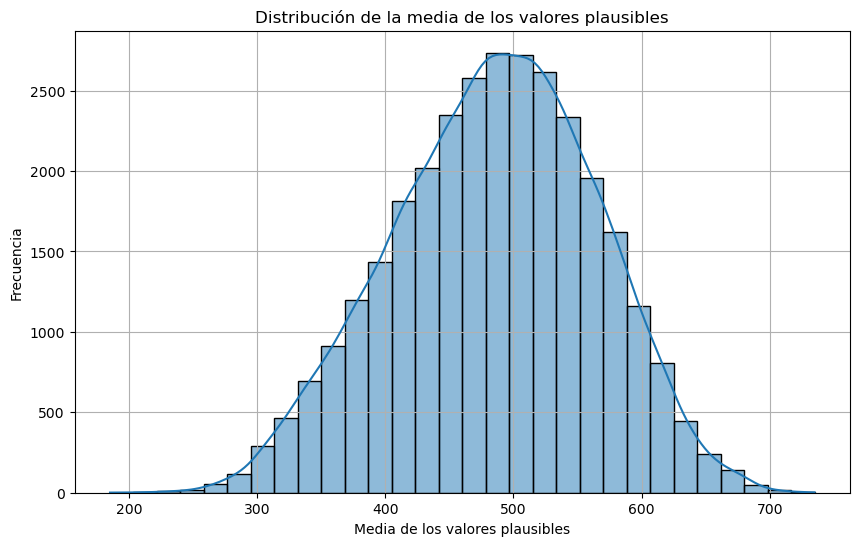

In [28]:
# histograma media pv
plt.figure(figsize=(10, 6))
sns.histplot(df_students_clean['media_pv'], bins=30, kde=True)
plt.title('Distribución de la media de los valores plausibles')
plt.xlabel('Media de los valores plausibles')
plt.ylabel('Frecuencia')
plt.grid()

Teniendo en cuanta que la OCDE suele considerar el Nivel 2 (≈ 400-420) como el nivel mínimo de competencia, estableceremos 420 como umbral para considerar el aprobado. 

In [29]:
# por encima de 420, atribuiremos el valor 1, y por debajo de 420, el valor 0
df_students_clean['aprobado'] = np.where(df_students_clean['media_pv'] > 420, 1, 0)
df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,PA003Q01TA,PA003Q18WA,PA003Q05IA,PA003Q20WA,PA003Q12JA,PA008Q01TA,PA008Q02TA,PA008Q03TA,PA008Q04TA,PA008Q05TA,PA008Q06NA,PA008Q07NA,PA008Q08NA,PA008Q09NA,PA008Q10NA,PA185Q01JA,PA041Q01TA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV6MATH,PV7MATH,PV8MATH,PV9MATH,PV10MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,media_pv,aprobado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.564,496.437,461.107,413.795,468.306,474.359,440.060,466.289,501.799,498.667,448.468,430.204,427.666,467.043,506.138,456.182,495.261,436.598,455.164,431.586,506.912,520.943,445.915,447.578,510.355,469.425,485.229,520.293,509.465,520.461,473.675633,1
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,Most lessons,Some lessons,Not Checked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,487.555,463.191,556.850,468.725,498.460,489.506,520.003,448.336,456.592,559.451,527.749,550.748,545.087,528.339,507.892,522.393,564.715,560.937,554.602,512.845,472.056,497.419,583.550,486.117,543.515,501.654,522.876,518.897,540.951,555.862,518.229100,1
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,Some lessons,Some lessons,Not Checked,Every day or almost every day,NaN,Every day or almost every day,Every day or almost every day,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,A few times,Every day or almost every day,NaN,Never,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,Sometimes,Sometimes,Almost always,Almost always,Sometimes,Sometimes,Almost never,Almost always,298.642,340.790,334.073,348.531,292.141,316.104,319.801,328.778,315.272,284.522,413.123,325.643,312.483,360.927,344.364,334.633,347.122,343.097,368.747,334.109,336.125,383.288,390.317,360.386,389.356,424.082,377.563,422.321,363.447,431.934,351.390700,0
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,Every lesson,Every lesson,Not Checked,NaN,NaN,Every day or almost every day,NaN,NaN,About once or twice a week,Every day or almost every day,About once or twice a week,Every day or almost every day,NaN,NaN,A few times,NaN,Every day or almost every day,Every day or almost every day,Never,About once or twice a week,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Sometimes,Almost always,Almost always,Almost always,Almost never,Sometimes,Almost always,381.872,355.081,373.648,374.194,361.886,401.721,353.348,398.381,369.926,355.299,436.717,400.287,413.180,446.061,433.482,408.833,394.058,415.046,437.632,461.843,413.822,324.202,343.227,284.083,330.103,351.840,353.562,381.369,366.970,350.518,382.406367,0
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,Most lessons,Every lesson,Checked,Every day or almost every day,Every day or almost every day,NaN,NaN,Every day or almost every day,Never or almost never,NaN,NaN,About onc

In [30]:
# eliminamos todas las columnas de PV (columnas_target) y "media_pv", ya que ya no las vamos a necesitar
df_students_clean.drop(columnas_target, axis=1, inplace=True)
df_students_clean.drop('media_pv', axis=1, inplace=True)


In [31]:
df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,PA003Q01TA,PA003Q18WA,PA003Q05IA,PA003Q20WA,PA003Q12JA,PA008Q01TA,PA008Q02TA,PA008Q03TA,PA008Q04TA,PA008Q05TA,PA008Q06NA,PA008Q07NA,PA008Q08NA,PA008Q09NA,PA008Q10NA,PA185Q01JA,PA041Q01TA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,aprobado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,Most lessons,Some lessons,Not Checked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,1
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,Some lessons,Some lessons,Not Checked,Every day or almost every day,NaN,Every day or almost every day,Every day or almost every day,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,NaN,NaN,Every day or almost every day,A few times,Every day or almost every day,NaN,Never,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,Sometimes,Sometimes,Almost always,Almost always,Sometimes,Sometimes,Almost never,Almost always,0
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,Every lesson,Every lesson,Not Checked,NaN,NaN,Every day or almost every day,NaN,NaN,About once or twice a week,Every day or almost every day,About once or twice a week,Every day or almost every day,NaN,NaN,A few times,NaN,Every day or almost every day,Every day or almost every day,Never,About once or twice a week,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally satisfied,Satisfied,Almost always,Sometimes,Almost always,Almost always,Almost always,Almost never,Sometimes,Almost always,0
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,Most lessons,Every lesson,Checked,Every day or almost every day,Every day or almost every day,NaN,NaN,Every day or almost every day,Never or almost never,NaN,NaN,About once or twice a week,NaN,Every day or almost every day,NaN,NaN,About once or twice a week,About once or twice a week,A few times,NaN,A few times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,Almost always,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,1


In [32]:
# Configurar pandas para que no trunque la salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

            Número de Nulos  Porcentaje de Nulos (%)
ST267Q01JA            12284                39.883117
ST267Q02JA            12397                40.250000
ST267Q03JA            12336                40.051948
ST267Q04JA            12422                40.331169
ST267Q05JA            12255                39.788961
ST267Q06JA            12517                40.639610
ST267Q07JA            12419                40.321429
ST267Q08JA            12250                39.772727
ST270Q01JA             1994                 6.474026
ST270Q02JA             2054                 6.668831
ST270Q03JA             2044                 6.636364
ST270Q04JA             2031                 6.594156
ST297Q01JA             1394                 4.525974
ST300Q01JA            17378                56.422078
ST300Q02JA            17310                56.201299
ST300Q03JA            17289                56.133117
ST300Q04JA            17502                56.824675
ST300Q05JA            17468                56.

In [33]:
df_students_clean['ST300Q03JA'].value_counts()

ST300Q03JA
Every day or almost every day    8174
About once or twice a week       2913
About once or twice a month      1272
Never or almost never             709
About once or twice a year        443
Name: count, dtype: int64

In [34]:
df_students_clean.shape

(30800, 59)

In [35]:
# revisar

for column in preguntas_seleccionadas:
    print(f"{column}: {obtener_significado(column, compendio)}")

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q08JA: Agree/disagree: The teachers at my school are mean towards me.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How often: The teacher c

Podemos ver que las columnas del cuestionario de parents (aquellas que empiezan por PA) están llenas de nulos. Vamos a descartarlas.

In [36]:
# descartar columnas que empiezan por PA
df_students_clean = df_students_clean.drop(df_students_clean.filter(regex='^PA').columns, axis=1)

In [37]:
df_students_clean.columns

# save columns names in a list
columnas_a_guardar = df_students_clean.columns.tolist()

In [38]:
df_students_clean.shape

(30800, 42)

In [39]:
df_students_clean['ST297Q01JA'].value_counts(normalize=True)*100

ST297Q01JA
Not Checked    82.272325
Checked        17.727675
Name: proportion, dtype: float64

In [40]:
df_students_clean['ST267Q01JA'].value_counts(normalize=True)*100

ST267Q01JA
Agree                56.540289
Strongly agree       30.600562
Disagree              9.964355
Strongly disagree     2.894794
Name: proportion, dtype: float64

In [41]:
# save df_students_clean to csv

df_students_clean.to_csv('C:\\Users\\saraf\\OneDrive\\Escritorio\\df_students_clean.csv', index=False)

## Transformación de las columnas a numéricas 

In [42]:
# creamos los mappings que necesitemos

mapping_agree =  {"Strongly disagree": 0, "Disagree": 1, "Agree": 2, "Strongly agree": 3}
mapping_lesson = {"Never or almost never": 0, "Some lessons": 1, "Most lessons": 2, "Every lesson": 3}
mapping_checked = {"Not Checked": 0, "Checked": 1}
mapping_freq = {"Never or almost never": 0, "About once or twice a year": 1, "About once or twice a month": 2, "About once a week": 3, "Every day or almost every day": 4}
mapping_a_few = {'Never': 0, 'A few times': 1, 'About once or twice a week': 2, 'Every day or almost every day': 3 }
mapping_satisfied = {"Totally satisfied": 3 ,'Satisfied': 2, "Not satisfied": 1 , "Not at all satisfied": 0}
mapping_almost = {"Almost never": 0, "Sometimes": 1, "Almost always": 2}

In [43]:
# create transformers from mappings
def map_values(x, mapping):
    if isinstance(x, pd.DataFrame):
        # If x is a DataFrame, apply the mapping to each column
        return x.apply(lambda col: col.map(mapping))
    else:
        # If x is a Series, apply the mapping directly
        return x.map(mapping)

In [44]:
transformer_agree = FunctionTransformer(lambda x: map_values(x, mapping_agree))
transformer_lesson = FunctionTransformer(lambda x: map_values(x, mapping_lesson))
transformer_checked = FunctionTransformer(lambda x: map_values(x, mapping_checked))
transformer_freq = FunctionTransformer(lambda x: map_values(x, mapping_freq))
transformer_a_few = FunctionTransformer(lambda x: map_values(x, mapping_a_few))
transformer_satisfied = FunctionTransformer(lambda x: map_values(x, mapping_satisfied))
transformer_almost = FunctionTransformer(lambda x: map_values(x, mapping_almost))

In [45]:
columns_agree = ["ST267Q01JA", "ST267Q02JA", "ST267Q03JA", "ST267Q04JA", "ST267Q05JA", "ST267Q06JA", "ST267Q07JA", "ST267Q08JA"]
columns_lesson = ["ST270Q01JA", "ST270Q02JA", "ST270Q03JA", "ST270Q04JA"]
columns_checked = ["ST297Q01JA"]
columns_freq = ["ST300Q01JA", "ST300Q02JA", "ST300Q03JA", "ST300Q04JA", "ST300Q05JA", "ST300Q06JA", "ST300Q07JA", "ST300Q08JA",
                 "ST300Q09JA", "ST300Q10JA"]
columns_a_few = ['ST348Q04JA', 'ST348Q08JA', "ST353Q01JA", "ST353Q02JA", "ST353Q05JA", "ST353Q06JA", "ST353Q07JA", "ST353Q08JA"]
columns_satisfied = ['WB155Q08HA', 'WB155Q09HA']
columns_almost = ["WB163Q01HA", "WB163Q02HA", "WB163Q03HA", "WB163Q04HA", "WB163Q05HA", "WB163Q06HA", "WB163Q07HA", "WB163Q08HA"]

In [46]:
transform_pipe = ColumnTransformer(
    transformers = [
        ("transformer_agree", transformer_agree, columns_agree),
        ("transformer_lesson", transformer_lesson, columns_lesson),
        ("transformer_checked", transformer_checked, columns_checked),
        ("transformer_freq", transformer_freq, columns_freq),
        ("transformer_a_few", transformer_a_few, columns_a_few),
        ("transformer_satisfied", transformer_satisfied, columns_satisfied),
        ("transformer_almost", transformer_almost, columns_almost)
    ],
    remainder="passthrough"
)

In [47]:
df_students_num = transform_pipe.fit_transform(df_students_clean)

# transformamos el resultado a un dataframe
df_students_num = pd.DataFrame(df_students_num)

# Get all column names from the original dataframe
all_columns = (columns_agree + columns_lesson + columns_checked + columns_freq + 
               columns_a_few + columns_satisfied + columns_almost)

# Get the remaining columns (those not transformed)
remaining_columns = [col for col in df_students_clean.columns if col not in all_columns]

# Combine all column names in the order they appear in the transformed data
column_names = all_columns + remaining_columns

In [48]:
# Assign column names to the transformed dataframe
df_students_num.columns = column_names

df_students_num.head(8)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,aprobado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,1.0,3.0,NaN,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,0.0
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,1.0,NaN,3.0,3.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,4.0,4.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
5,3.0,3.0,NaN,0.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0
6,NaN,NaN,1.0,NaN,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
7,3.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,2.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,1.0


In [49]:
# df students num to csv
df_students_num.to_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_num.csv', index=False) # poner aqui el path
# donde querais guardar el csv (no GitHub)